# Exploratory Data Analysis ANZ

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv("Untitled Folder/ANZ synthesised transaction dataset.csv")
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [36]:
df.shape

(12043, 23)

In [37]:
df.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [38]:
df['account'].nunique()  # 100 unique customers

100

DROPPING IRRELEVANT FEATURES

In [39]:
df = df[["status","card_present_flag","txn_description","first_name","balance","date",
                   "gender","age","merchant_suburb","merchant_state",
                   "amount","country","customer_id","movement"]]
df['date']=pd.to_datetime(df['date'])
df.head()

,status,card_present_flag,txn_description,first_name,balance,date,gender,age,merchant_suburb,merchant_state,amount,country,customer_id,movement
0,authorized,1.0,POS,Diana,35.39,2018-01-08,F,26,Ashmore,QLD,16.25,Australia,CUS-2487424745,debit
1,authorized,0.0,SALES-POS,Diana,21.20,2018-01-08,F,26,Sydney,NSW,14.19,Australia,CUS-2487424745,debit
2,authorized,1.0,POS,Michael,5.71,2018-01-08,M,38,Sydney,NSW,6.42,Australia,CUS-2142601169,debit
3,authorized,1.0,SALES-POS,Rhonda,2117.22,2018-01-08,F,40,Buderim,QLD,40.90,Australia,CUS-1614226872,debit
4,authorized,1.0,SALES-POS,Diana,17.95,2018-01-08,F,26,Mermaid Beach,QLD,3.25,Australia,CUS-2487424745,debit


STARTING THE ANALYSIS

In [40]:
df['date'].value_counts()   #Total transactions made on each day

2018-09-28    174
2018-08-17    172
2018-05-10    168
2018-10-17    162
2018-09-14    161
             ... 
2018-06-08     99
2018-08-20     97
2018-10-23     96
2018-08-10     95
2018-10-30     89
Name: date, Length: 91, dtype: int64

In [41]:
df['customer_id'].value_counts()  # total transactions made by each costomer 

CUS-2487424745    578
CUS-2142601169    303
CUS-3026014945    292
CUS-3378712515    260
CUS-1614226872    259
                 ... 
CUS-3395687666     40
CUS-3201519139     37
CUS-1646183815     34
CUS-495599312      31
CUS-1739931018     25
Name: customer_id, Length: 100, dtype: int64

Transaction volume each day

In [42]:
df_date_count = df.groupby('date').count()

In [43]:
trans_vol = df_date_count['customer_id'].mean()
n_points = len(df_date_count.index)

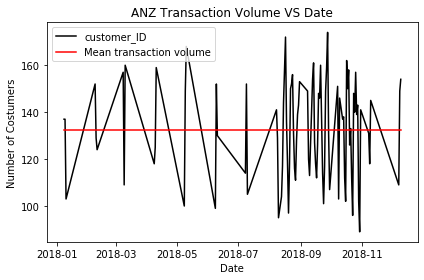

In [44]:
plt.figure()
plt.plot(df_date_count.index, df_date_count['customer_id'], c='black', label = 'customer_ID')
plt.plot(df_date_count.index, np.linspace(trans_vol,trans_vol,n_points), c='r', label='Mean transaction volume')
plt.title('ANZ Transaction Volume VS Date')
plt.xlabel('Date')
plt.ylabel('Number of Costumers')
plt.legend()
plt.tight_layout()

MEAN TRANSACTION AMOUNT EACH DAY


In [45]:
df_date_mean = df.groupby('date').mean()

In [46]:
trans_amt = df_date_mean['amount'].mean()
n_points = len(df_date_count.index)

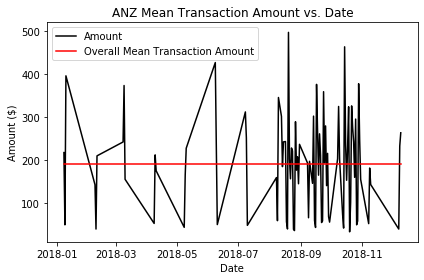

In [47]:
plt.figure()
plt.plot(df_date_count.index, df_date_mean['amount'], c='black', label='Amount')
plt.plot(df_date_count.index, np.linspace(trans_amt,trans_amt,n_points), c='r', label = 'Overall Mean Transaction Amount')
plt.title("ANZ Mean Transaction Amount vs. Date")
plt.xlabel("Date")
plt.ylabel("Amount ($)")
plt.legend()
plt.tight_layout()

TOTAL TRANSACTION BY EACH COSTUMER

In [51]:
df['customer_id'].value_counts()

CUS-2487424745    578
CUS-2142601169    303
CUS-3026014945    292
CUS-3378712515    260
CUS-1614226872    259
                 ... 
CUS-3395687666     40
CUS-3201519139     37
CUS-1646183815     34
CUS-495599312      31
CUS-1739931018     25
Name: customer_id, Length: 100, dtype: int64

In [52]:
df['first_name'].value_counts()

Michael      746
Diana        578
Jessica      408
Joseph       391
Jeffrey      388
            ... 
Cindy         51
Elizabeth     44
David         40
Andrew        34
Jonathan      31
Name: first_name, Length: 80, dtype: int64

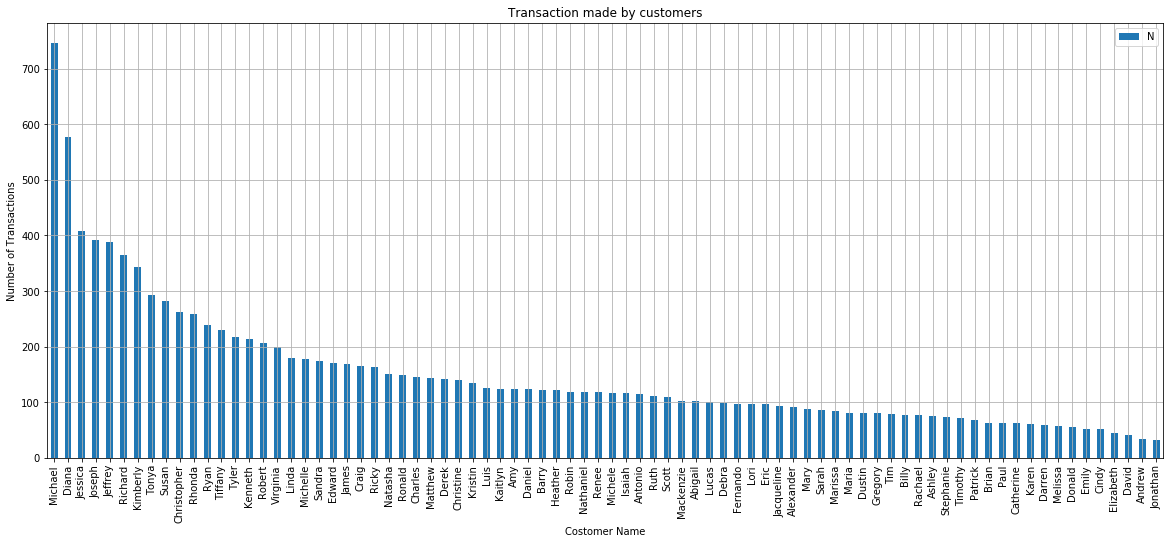

In [54]:
plt.figure(figsize=(20,8))
df['first_name'].value_counts().plot.bar()
plt.title('Transaction made by customers')
plt.xlabel('Costomer Name')
plt.xticks(rotation=90)
plt.grid(True)
plt.ylabel('Number of Transactions')
plt.legend('Name of costumer')
plt.show()

TYPES OF TRANSACTION

In [55]:
df['txn_description'].value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

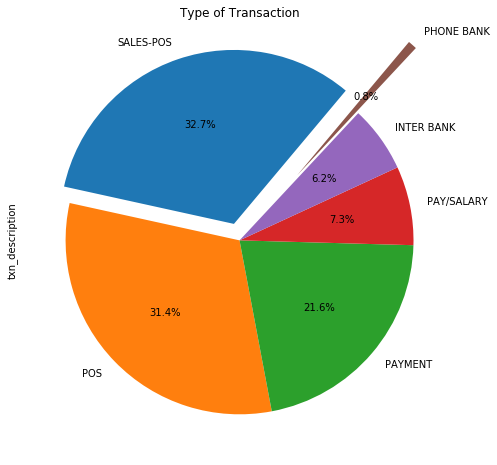

In [56]:
plt.figure(figsize=(8,8))
explode = (0.1,0,0,0,0,0.5)
df['txn_description'].value_counts().plot.pie(explode=explode, autopct='%1.1f%%', startangle=50)
plt.title('Type of Transaction')
plt.show()

In [57]:
df['movement'].value_counts()

debit     11160
credit      883
Name: movement, dtype: int64

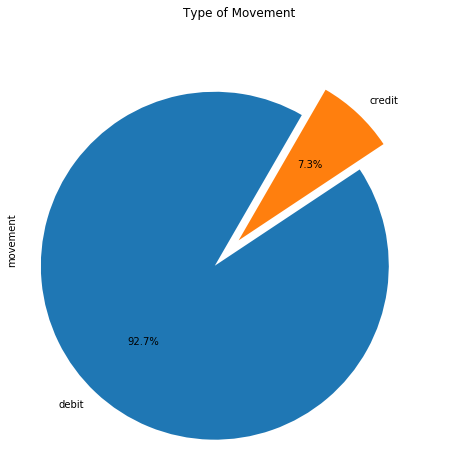

In [60]:
plt.figure(figsize=(8,8))
explode = (0.2,0)
df['movement'].value_counts().plot.pie(explode=explode, autopct='%1.1f%%', startangle=60)
plt.title('Type of Movement')
plt.show()